## Problem Statement

![](https://datahack-prod.s3.ap-south-1.amazonaws.com/__sized__/contest_cover/janta_hack-thumbnail-1200x1200-90.jpg)

**Credit Card Payment Default Prediction**

Credit card is a flexible tool by which a customer can use a bank's money for a short period of time. 
Predicting accurately which customers are most probable to default represents a significant business opportunity for all banks. Bank cards are the most common credit card type in Taiwan, which emphasizes the impact of risk prediction on both the consumers and banks. 
This would inform the bank’s decisions on criteria to approve a credit card application and also decide upon what credit limit to provide.

![](https://cdn.analyticsvidhya.com/wp-content/uploads/2020/03/credit-card-banks-money-300x225.jpg)

This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005. 
Using the information given, predict the probability of a customer defaulting in the next month.

**About Data Source:**
Lichman, M. (2013). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.)



Evaluation Metric
Submissions are evaluated on area under the ROC curve between the predicted probability and the observed target.

In [1]:
## import necessary libraries.

import numpy as np ## Numpy Library ( will use to convert data frame to array or creating array etc...).
import pandas as pd ## Pandas Library (will use to load data,create data frame...etc).
import os ## For connecting to machine to get path for reading/writing files.
from sklearn.model_selection import train_test_split ## For splitting data into train and validation.
import matplotlib.pyplot as plt ## For visualization.
import seaborn as sns ## For visualization.

In [2]:
## Get cuurent working directory
os.getcwd()

'D:\\Python\\Pratice'

In [3]:
## Set how many rows and columns you want to display in jupyter notebook.
pd.options.display.max_columns = 200 
pd.get_option('display.max_rows') 
pd.set_option('display.max_rows',None)

In [4]:
## Read train data. 
data = pd.read_csv('train.csv',header='infer',sep=',')

In [5]:
## Read test data.
test_data = pd.read_csv('test.csv',header='infer',sep=',')

In [6]:
## Get first 5 records of train data.
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,25150,360000,2,2,2,25,-1,-1,-1,-1,-1,-1,20952,12590,3479,3435,8870,2020,12590,3479,3446,8870,2020,27043,0
1,13470,240000,2,1,2,46,2,2,-2,-1,0,-1,456,0,0,2240,1681,2267,0,0,2240,0,2267,3074,0
2,3092,320000,2,2,1,41,0,0,0,0,0,0,49846,53811,38717,35409,35036,35939,5000,2000,2000,3000,3000,1500,0
3,13973,50000,2,2,2,24,-1,-1,-2,-2,-2,-2,2675,0,0,0,0,0,0,0,0,0,0,0,1
4,10567,80000,1,3,1,52,-1,0,0,0,0,0,35861,18521,19385,20561,21261,21457,1500,1500,1500,1028,876,1449,0


In [8]:
## Get last 5 records of train data.
data.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
20995,6283,50000,2,2,2,31,1,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,0
20996,25589,80000,2,2,1,37,0,0,0,0,0,0,69767,73197,44195,45458,48679,49895,5000,3000,2000,4000,2000,2000,0
20997,4378,100000,1,1,1,52,1,2,2,2,0,0,21509,20877,24122,23440,28843,31353,0,3600,0,6000,3000,0,1
20998,8604,90000,2,2,1,47,0,0,0,0,0,0,28477,28718,28847,28747,29177,29452,2000,2000,2000,2000,2000,2000,0
20999,18049,90000,1,3,1,44,1,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,1


In [7]:
## Get first 5 records of test data.
test_data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,10178,60000,2,2,1,30,0,0,0,0,0,0,36082,37127,38117,38874,38667,39544,1628,1618,1375,1403,1520,1205
1,5304,200000,2,1,2,29,0,0,0,0,2,0,61099,64160,76593,93988,50292,10510,4160,14593,20150,0,5739,12050
2,5187,230000,1,1,2,39,0,0,0,0,-2,-2,38395,39943,20650,0,0,0,2500,2000,0,0,0,0
3,14495,150000,1,1,2,40,0,0,0,0,0,0,152175,148872,145978,139791,142745,146872,5800,5245,5200,5200,6500,7200
4,20444,140000,1,2,2,27,0,0,0,0,0,0,80210,67746,76230,77954,78953,81848,10000,10000,3393,3260,5000,3000


In [9]:
## Get last 5 records of test data.
test_data.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
8995,16413,230000,2,2,1,42,-1,-1,-2,-2,-2,-2,3210,0,0,0,0,0,0,0,0,0,0,0
8996,17210,90000,2,1,2,28,-1,-1,-1,-1,-1,-1,2780,1950,7956,499,0,5990,1950,7956,499,0,5990,0
8997,24002,60000,1,2,2,26,0,0,0,0,0,0,58072,59040,57416,55736,26958,28847,2282,2324,2049,2000,3000,1120
8998,17019,70000,2,2,2,23,0,0,0,0,0,0,44830,46185,47208,47241,48212,45849,2100,2079,2500,2000,2000,1700
8999,23415,600000,2,2,1,38,1,2,2,2,0,0,51072,49889,39635,35130,33229,32171,0,4000,0,1500,2000,3000


In [10]:
## Get summary statistics of train data.
data.describe(include='all')

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
count,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.00000,21000.000000,21000.000000,21000.00000,21000.000000,21000.000000,21000.000000,21000.000000,2.100000e+04,21000.000000,21000.000000,21000.000000,21000.000000,2.100000e+04,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000
mean,14949.183667,167214.746667,1.607571,1.854190,1.551714,35.461619,-0.01119,-0.127238,-0.164857,-0.21819,-0.260952,-0.288667,51501.542381,49463.502667,4.723258e+04,43387.372476,40398.551095,38931.194000,5686.349333,5.923003e+03,5202.325333,4793.172000,4797.012952,5211.736762,0.221190
std,8632.775153,128965.188482,0.488303,0.791628,0.521176,9.206628,1.12321,1.198957,1.198624,1.17221,1.141454,1.151592,73453.641859,70866.586004,6.953988e+04,64081.073110,60396.811177,59196.499234,16868.075695,2.390953e+04,17006.416467,15467.403159,15270.031988,17698.795697,0.415058
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.00000,-2.000000,-2.000000,-2.00000,-2.000000,-2.000000,-14386.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-209051.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7508.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.00000,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,3564.750000,3000.000000,2.686250e+03,2332.000000,1759.000000,1242.750000,998.250000,8.360000e+02,390.000000,284.000000,241.000000,102.000000,0.000000
50%,14939.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,22578.000000,21550.000000,2.024200e+04,19158.500000,18266.500000,17203.500000,2100.000000,2.011000e+03,1811.500000,1500.000000,1500.000000,1500.000000,0.000000
75%,22386.750000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,67876.250000,64918.250000,6.082675e+04,55376.750000,50517.250000,49463.000000,5023.250000,5.000000e+03,4500.000000,4002.250000,4051.000000,4000.000000,0.000000
max,29998.000000,800000.000000,2.000000,6.000000,3.000000,75.000000,8.00000,8.000000,8.000000,8.00000,8.000000,8.000000,746814.000000,743970.000000,1.664089e+06,706864.000000,587067.000000,699944.000000,873552.000000,1.684259e+06,889043.000000,621000.000000,417990.000000,528666.000000,1.000000


In [11]:
## Get summary statistics of test data.
test_data.describe(include='all')

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9.000000e+03,9000.000000,9000.000000,9000.000000,9000.000000
mean,15120.238111,168113.333333,1.594778,1.850667,1.552222,35.541222,-0.029556,-0.149000,-0.169333,-0.226444,-0.278444,-0.296778,50574.170778,48515.411000,46501.167889,42972.627444,40108.050667,38733.082000,5610.453222,5.916870e+03,5280.179222,4902.854889,4804.928556,5224.289444
std,8723.820188,131560.409674,0.490962,0.787395,0.523846,9.244435,1.125137,1.192971,1.192819,1.161984,1.113626,1.146280,74059.323969,71885.007341,68903.980549,64919.203875,61724.102415,60383.379063,15830.072097,2.087517e+04,18935.182165,16121.011036,15298.441141,17960.675353
min,13.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-33350.000000,-17706.000000,-9415.000000,-28335.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,7479.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3556.000000,2910.000000,2651.750000,2314.750000,1796.750000,1267.000000,1000.000000,8.200000e+02,396.000000,315.500000,289.500000,150.000000
50%,15126.000000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21766.000000,20452.500000,19791.500000,18803.000000,17781.500000,16715.000000,2100.000000,2.004000e+03,1800.000000,1500.000000,1500.000000,1500.000000
75%,22739.500000,240000.000000,2.000000,2.000000,2.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,64919.000000,61928.000000,58479.250000,52609.750000,49529.250000,48671.000000,5000.000000,5.000000e+03,4524.000000,4086.250000,4005.250000,4005.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,7.000000,8.000000,7.000000,7.000000,7.000000,964511.000000,983931.000000,855086.000000,891586.000000,927171.000000,961664.000000,505000.000000,1.024516e+06,896040.000000,528897.000000,426529.000000,527143.000000


In [12]:
## Get train data columns data types.
data.dtypes

ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default_payment_next_month    int64
dtype: object

In [13]:
## Get test data columns data types.
test_data.dtypes

ID           int64
LIMIT_BAL    int64
SEX          int64
EDUCATION    int64
MARRIAGE     int64
AGE          int64
PAY_0        int64
PAY_2        int64
PAY_3        int64
PAY_4        int64
PAY_5        int64
PAY_6        int64
BILL_AMT1    int64
BILL_AMT2    int64
BILL_AMT3    int64
BILL_AMT4    int64
BILL_AMT5    int64
BILL_AMT6    int64
PAY_AMT1     int64
PAY_AMT2     int64
PAY_AMT3     int64
PAY_AMT4     int64
PAY_AMT5     int64
PAY_AMT6     int64
dtype: object

In [14]:
## Get train data column names.
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default_payment_next_month'],
      dtype='object')

In [15]:
## Get test data column names.
test_data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [16]:
## Get index range for train data.
data.index

RangeIndex(start=0, stop=21000, step=1)

In [17]:
## Get index range for test data.
test_data.index

RangeIndex(start=0, stop=9000, step=1)

In [18]:
## Check dimensions of train data.
data.shape

(21000, 25)

In [19]:
## Check dimensions of test data.
test_data.shape

(9000, 24)

In [21]:
## Check NAs values for train data.
data.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default_payment_next_month    0
dtype: int64

In [22]:
## Check NAs values for test data.
test_data.isna().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
dtype: int64

In [23]:
## This method will return number of levels,null values,unique values,data types.

def Observations(df):
    return(pd.DataFrame({'dtypes' : df.dtypes,
                         'levels' : [df[x].unique() for x in df.columns],
                         'null_values' : df.isna().sum(),
                         'Unique Values': df.nunique()
                        }))

In [24]:
## Get data types,number of level,null values,unique values for each columns of train data.
Observations(data)

,dtypes,levels,null_values,Unique Values
ID,int64,"[25150, 13470, 3092, 13973, 10567, 28050, 2332...",0,21000
LIMIT_BAL,int64,"[360000, 240000, 320000, 50000, 80000, 150000,...",0,78
SEX,int64,"[2, 1]",0,2
EDUCATION,int64,"[2, 1, 3, 5, 4, 6, 0]",0,7
MARRIAGE,int64,"[2, 1, 3, 0]",0,4
AGE,int64,"[25, 46, 41, 24, 52, 29, 36, 31, 28, 34, 27, 5...",0,55
PAY_0,int64,"[-1, 2, 0, -2, 1, 3, 5, 4, 7, 6, 8]",0,11
PAY_2,int64,"[-1, 2, 0, -2, 3, 1, 4, 6, 5, 7, 8]",0,11
PAY_3,int64,"[-1, -2, 0, 2, 3, 7, 4, 5, 6, 8, 1]",0,11
PAY_4,int64,"[-1, 0, -2, 2, 3, 4, 7, 5, 6, 8]",0,10


In [25]:
## Get data types,number of level,null values,unique values for each columns of test data.
Observations(test_data)

,dtypes,levels,null_values,Unique Values
ID,int64,"[10178, 5304, 5187, 14495, 20444, 17667, 21211...",0,9000
LIMIT_BAL,int64,"[60000, 200000, 230000, 150000, 140000, 210000...",0,74
SEX,int64,"[2, 1]",0,2
EDUCATION,int64,"[2, 1, 3, 5, 4, 6, 0]",0,7
MARRIAGE,int64,"[1, 2, 3, 0]",0,4
AGE,int64,"[30, 29, 39, 40, 27, 41, 38, 61, 33, 25, 43, 5...",0,53
PAY_0,int64,"[0, 1, -1, -2, 2, 4, 8, 3, 6, 5, 7]",0,11
PAY_2,int64,"[0, -2, -1, 2, 3, 7, 1, 5, 4, 6]",0,10
PAY_3,int64,"[0, -2, 2, -1, 6, 4, 3, 7, 5, 1, 8]",0,11
PAY_4,int64,"[0, -2, 2, -1, 3, 5, 7, 4, 1, 6]",0,10


In [26]:
## Get category columns.
cat_columns_list = {'SEX','EDUCATION','MARRIAGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6'}

In [27]:
## Convert int data type to category data types for the given data frame.
def dataTypesConversion(df,columnList):
    for col in columnList:
        df[col] = df[col].astype('str').astype('category')

In [28]:
## Convert int data types to category types for train data.
dataTypesConversion(data,cat_columns_list)

In [29]:
## Convert int data types to category types for test data.
dataTypesConversion(test_data,cat_columns_list)

In [30]:
## Check columns data types of train data after data types conversions.
data.dtypes

ID                               int64
LIMIT_BAL                        int64
SEX                           category
EDUCATION                     category
MARRIAGE                      category
AGE                              int64
PAY_0                         category
PAY_2                         category
PAY_3                         category
PAY_4                         category
PAY_5                         category
PAY_6                         category
BILL_AMT1                        int64
BILL_AMT2                        int64
BILL_AMT3                        int64
BILL_AMT4                        int64
BILL_AMT5                        int64
BILL_AMT6                        int64
PAY_AMT1                         int64
PAY_AMT2                         int64
PAY_AMT3                         int64
PAY_AMT4                         int64
PAY_AMT5                         int64
PAY_AMT6                         int64
default_payment_next_month       int64
dtype: object

In [31]:
## Check columns data types of test data after data types conversions.
test_data.dtypes

ID              int64
LIMIT_BAL       int64
SEX          category
EDUCATION    category
MARRIAGE     category
AGE             int64
PAY_0        category
PAY_2        category
PAY_3        category
PAY_4        category
PAY_5        category
PAY_6        category
BILL_AMT1       int64
BILL_AMT2       int64
BILL_AMT3       int64
BILL_AMT4       int64
BILL_AMT5       int64
BILL_AMT6       int64
PAY_AMT1        int64
PAY_AMT2        int64
PAY_AMT3        int64
PAY_AMT4        int64
PAY_AMT5        int64
PAY_AMT6        int64
dtype: object

In [32]:
## Set Id as index to train data and check first 5 records of train data after setting index.
data = data.set_index('ID')
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
ID,,,,,,,,,,,,,,,,,,,,,,,,
25150,360000,2,2,2,25,-1,-1,-1,-1,-1,-1,20952,12590,3479,3435,8870,2020,12590,3479,3446,8870,2020,27043,0
13470,240000,2,1,2,46,2,2,-2,-1,0,-1,456,0,0,2240,1681,2267,0,0,2240,0,2267,3074,0
3092,320000,2,2,1,41,0,0,0,0,0,0,49846,53811,38717,35409,35036,35939,5000,2000,2000,3000,3000,1500,0
13973,50000,2,2,2,24,-1,-1,-2,-2,-2,-2,2675,0,0,0,0,0,0,0,0,0,0,0,1
10567,80000,1,3,1,52,-1,0,0,0,0,0,35861,18521,19385,20561,21261,21457,1500,1500,1500,1028,876,1449,0


In [33]:
## Set Id as index to test data and check first 5 records of test data after setting index.
test_data.set_index('ID',inplace=True)
test_data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
ID,,,,,,,,,,,,,,,,,,,,,,,
10178,60000,2,2,1,30,0,0,0,0,0,0,36082,37127,38117,38874,38667,39544,1628,1618,1375,1403,1520,1205
5304,200000,2,1,2,29,0,0,0,0,2,0,61099,64160,76593,93988,50292,10510,4160,14593,20150,0,5739,12050
5187,230000,1,1,2,39,0,0,0,0,-2,-2,38395,39943,20650,0,0,0,2500,2000,0,0,0,0
14495,150000,1,1,2,40,0,0,0,0,0,0,152175,148872,145978,139791,142745,146872,5800,5245,5200,5200,6500,7200
20444,140000,1,2,2,27,0,0,0,0,0,0,80210,67746,76230,77954,78953,81848,10000,10000,3393,3260,5000,3000


In [34]:
## Seperate numeric and categorical columns for train data.
cat_columns = data.select_dtypes(include=['category'])
num_columns = data.select_dtypes(include=['int64'])

In [35]:
## Seperate numeric and categorical columns for test data.
test_cat_columns = test_data.select_dtypes(include=['category'])
test_num_columns = test_data.select_dtypes(include=['int64'])

In [36]:
## Check correlation for train data columns.
data[num_columns.columns].corr()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
LIMIT_BAL,1.000000,0.143206,0.290539,0.283654,0.288947,0.297446,0.297377,0.291518,0.194995,0.176589,0.206638,0.199472,0.221325,0.215073,-0.159163
AGE,0.143206,1.000000,0.054186,0.053819,0.053439,0.049968,0.048377,0.047465,0.025439,0.022501,0.025842,0.026427,0.024296,0.016846,0.006664
BILL_AMT1,0.290539,0.054186,1.000000,0.951243,0.889651,0.856470,0.826714,0.798465,0.138656,0.097091,0.131645,0.153106,0.166235,0.184700,-0.028493
BILL_AMT2,0.283654,0.053819,0.951243,1.000000,0.926553,0.892248,0.860917,0.829886,0.277851,0.106219,0.131176,0.147061,0.160733,0.179634,-0.022796
BILL_AMT3,0.288947,0.053439,0.889651,0.926553,1.000000,0.924068,0.884616,0.851770,0.239077,0.315926,0.123667,0.140971,0.189345,0.184794,-0.022824
BILL_AMT4,0.297446,0.049968,0.856470,0.892248,0.924068,1.000000,0.940091,0.899136,0.238057,0.206505,0.282794,0.123313,0.170126,0.185184,-0.020185
BILL_AMT5,0.297377,0.048377,0.826714,0.860917,0.884616,0.940091,1.000000,0.943850,0.224684,0.178411,0.228640,0.285776,0.146920,0.173734,-0.015790
BILL_AMT6,0.291518,0.047465,0.798465,0.829886,0.851770,0.899136,0.943850,1.000000,0.208428,0.171109,0.210850,0.243471,0.317413,0.123303,-0.015480
PAY_AMT1,0.194995,0.025439,0.138656,0.277851,0.239077,0.238057,0.224684,0.208428,1.000000,0.324954,0.306546,0.233288,0.159679,0.181988,-0.076042
PAY_AMT2,0.176589,0.022501,0.097091,0.106219,0.315926,0.206505,0.178411,0.171109,0.324954,1.000000,0.292610,0.202391,0.191733,0.138168,-0.059409


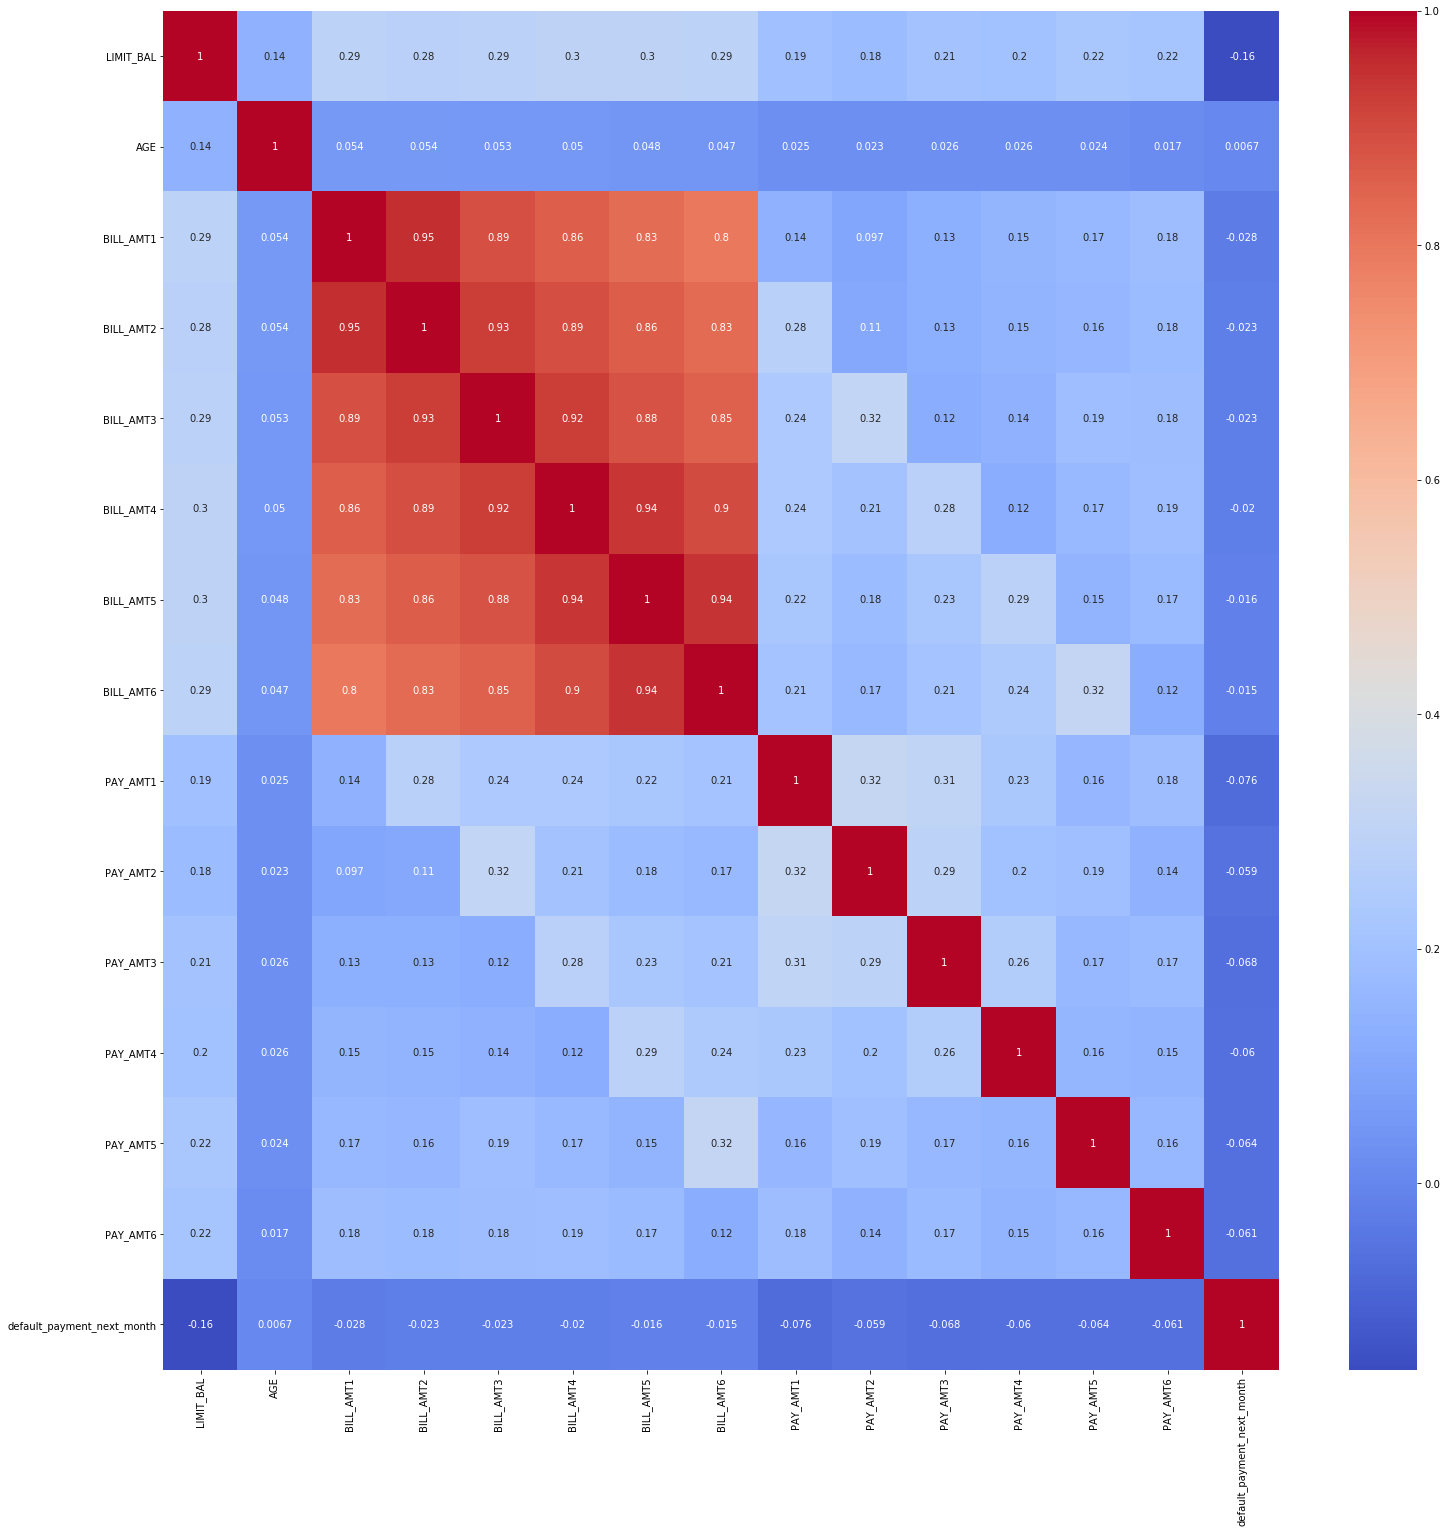

In [37]:
## Plot correlation table.
plt.figure(figsize=(25,25))
sns.heatmap(data.corr(),cmap='coolwarm',annot = True)
plt.show()

In [38]:
## Check correlation for test data columns.
test_data[test_num_columns.columns].corr()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
LIMIT_BAL,1.000000,0.148123,0.273933,0.266360,0.270202,0.286223,0.291532,0.287880,0.196332,0.184743,0.217943,0.211524,0.207816,0.229791
AGE,0.148123,1.000000,0.061049,0.055431,0.054416,0.054572,0.051582,0.047974,0.027972,0.020037,0.036437,0.010093,0.019494,0.025503
BILL_AMT1,0.273933,0.061049,1.000000,0.952039,0.898501,0.868968,0.836781,0.812201,0.144500,0.106108,0.209924,0.169972,0.168868,0.167138
BILL_AMT2,0.266360,0.055431,0.952039,1.000000,0.932616,0.893023,0.857248,0.835476,0.287107,0.087535,0.191583,0.148253,0.151608,0.162083
BILL_AMT3,0.270202,0.054416,0.898501,0.932616,1.000000,0.923902,0.882583,0.857162,0.257764,0.321524,0.144067,0.149089,0.157088,0.176647
BILL_AMT4,0.286223,0.054572,0.868968,0.893023,0.923902,1.000000,0.940257,0.905033,0.221098,0.212025,0.336590,0.145464,0.138159,0.160514
BILL_AMT5,0.291532,0.051582,0.836781,0.857248,0.882583,0.940257,1.000000,0.951451,0.198958,0.190288,0.301475,0.309272,0.129412,0.142705
BILL_AMT6,0.287880,0.047974,0.812201,0.835476,0.857162,0.905033,0.951451,1.000000,0.179820,0.178248,0.281475,0.265146,0.285653,0.097894
PAY_AMT1,0.196332,0.027972,0.144500,0.287107,0.257764,0.221098,0.198958,0.179820,1.000000,0.173980,0.133370,0.119890,0.120843,0.195324
PAY_AMT2,0.184743,0.020037,0.106108,0.087535,0.321524,0.212025,0.190288,0.178248,0.173980,1.000000,0.135055,0.125003,0.153276,0.210195


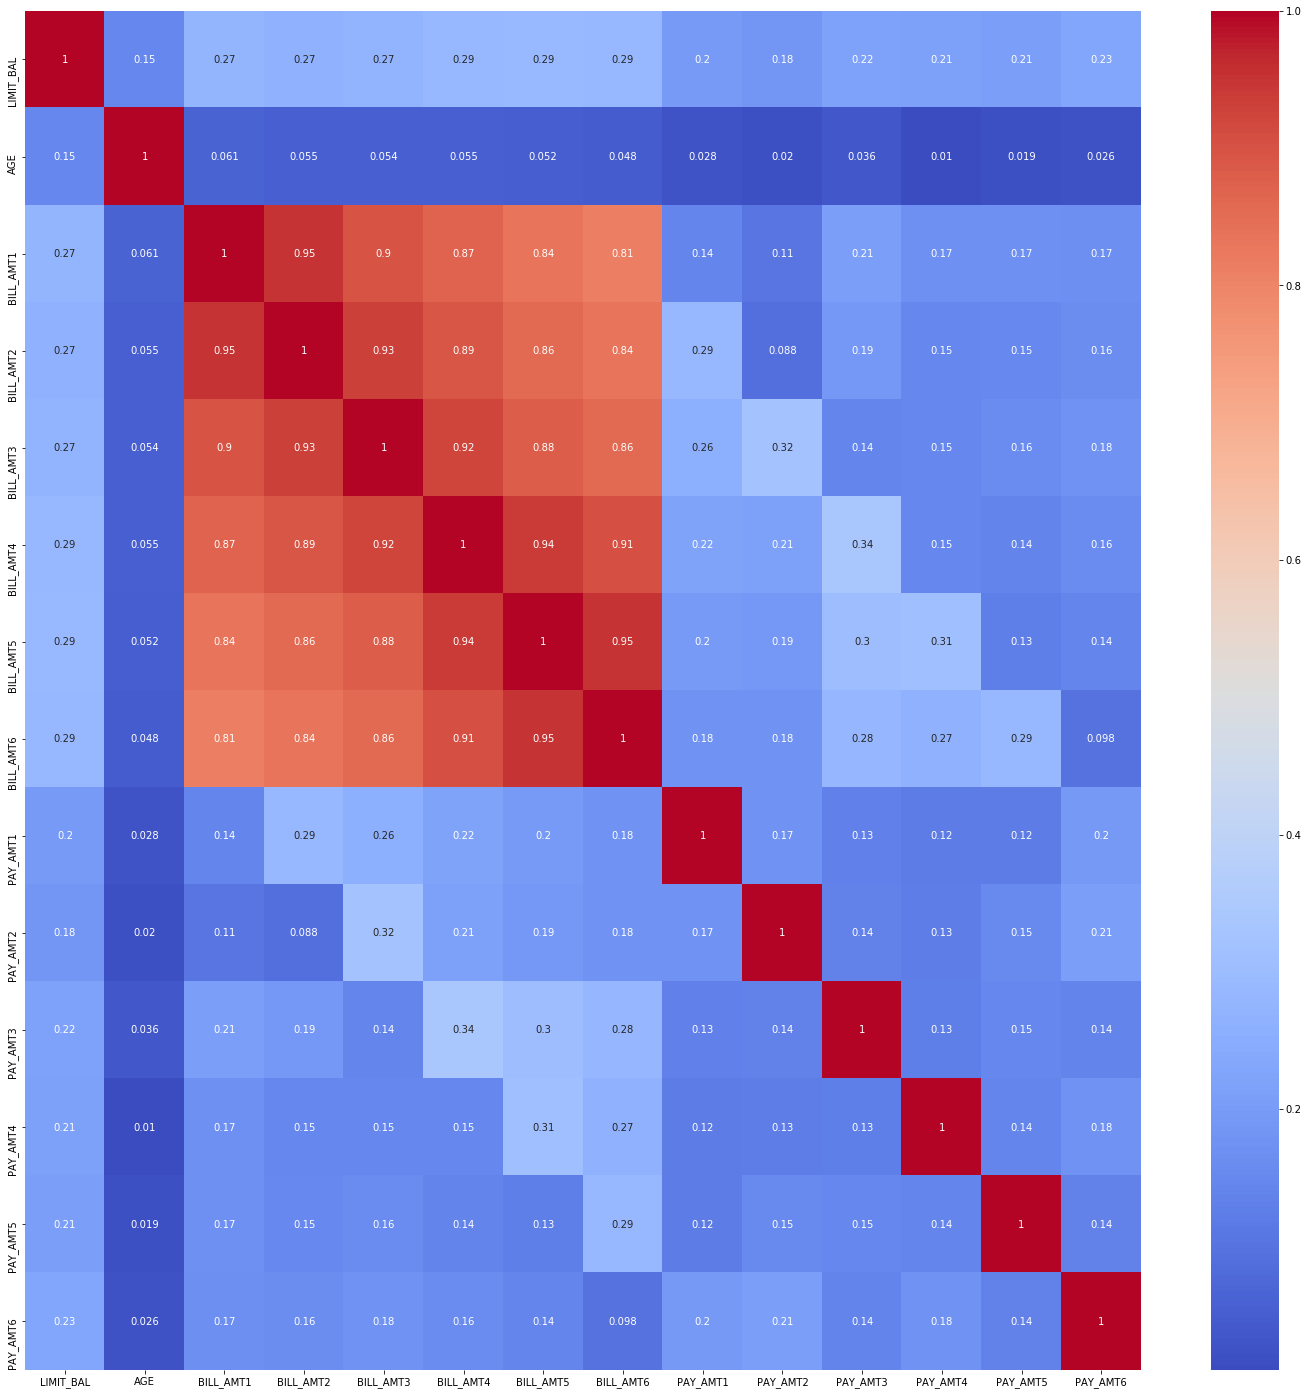

In [39]:
## Plot corrlation table.
plt.figure(figsize=(25,25))
sns.heatmap(test_data.corr(),cmap='coolwarm',annot = True)
plt.show()

In [40]:
## Calculate variance for numeric columns.
def variance(x):
        return(pd.DataFrame({'Datatype' : x.dtypes,
                            'Variance': [round(x[i].var()) for i in x] }))

## Get varince for train data numeric columns.
variance(num_columns)

,Datatype,Variance
LIMIT_BAL,int64,16632019840
AGE,int64,85
BILL_AMT1,int64,5395437502
BILL_AMT2,int64,5022073012
BILL_AMT3,int64,4835795392
BILL_AMT4,int64,4106383931
BILL_AMT5,int64,3647774800
BILL_AMT6,int64,3504225522
PAY_AMT1,int64,284531978
PAY_AMT2,int64,571665456


In [41]:
## Get varince for test data numeric columns.
variance(test_num_columns)

,Datatype,Variance
LIMIT_BAL,int64,17308141393
AGE,int64,85
BILL_AMT1,int64,5484783467
BILL_AMT2,int64,5167454280
BILL_AMT3,int64,4747758536
BILL_AMT4,int64,4214503032
BILL_AMT5,int64,3809864819
BILL_AMT6,int64,3646152467
PAY_AMT1,int64,250591183
PAY_AMT2,int64,435772556


In [42]:
## Seperate Target and Predictors and display dimensions.

features = data.drop('default_payment_next_month', axis = 1)
print(features.shape)
target = data['default_payment_next_month']
print(target.shape)

(21000, 23)
(21000,)


In [44]:
## Split data into train and validation(70:30 ratio).
X_train,X_test,y_train,y_test=train_test_split(features,target,test_size=0.3,random_state=123)

In [45]:
## Check first 5 records of train data.
X_train.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
ID,,,,,,,,,,,,,,,,,,,,,,,
26747,220000,1,1,2,29,1,2,2,2,2,2,31012,30215,33117,32286,34320,33634,0,3400,0,2576,0,2671
9184,130000,1,1,2,27,0,0,0,0,0,0,32464,33805,34810,35194,35951,36703,1867,1872,1256,1500,1500,1500
23776,30000,2,2,2,50,0,0,0,0,0,0,25416,26260,24084,23631,29863,29369,1389,1602,1563,8500,1100,500
16421,320000,2,1,2,32,-1,-1,-1,0,0,-1,20488,18607,41195,89714,64646,6103,18615,42067,30014,39515,6110,11611
15046,210000,1,2,1,40,-1,-1,-2,-2,-2,-2,3180,0,0,0,0,0,0,0,0,0,0,0


In [46]:
## Check first 5 records of validation data.
X_test.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
ID,,,,,,,,,,,,,,,,,,,,,,,
29954,170000,1,1,2,30,0,0,0,0,-2,-2,129848,89684,31050,0,0,0,5115,2500,0,0,0,0
26480,30000,2,2,1,54,0,0,0,0,0,-1,33494,32978,32415,30324,31124,25502,2506,2430,1300,1000,34436,950
10109,30000,1,2,1,24,0,0,0,0,0,0,29416,30476,30386,29769,30395,30348,1540,1447,1027,1066,1288,1104
19641,60000,2,1,2,32,1,2,0,0,0,2,17992,17405,18619,19636,20326,21534,0,1500,1328,1018,1687,778
4123,130000,2,1,2,25,-1,-1,-1,-1,-1,-1,1088,1521,6042,1085,947,495,1521,6044,1619,947,495,0


In [48]:
## Seperate category and numerics columns for train data.
catcols_train = X_train.select_dtypes(include=['category'])
numcols_train = X_train.select_dtypes(include=['int64'])

In [49]:
## Seperate category and numerics columns for validation data.
catcols_test = X_test.select_dtypes(include=['category'])
numcols_test = X_test.select_dtypes(include=['int64'])

In [50]:
## Seperate category and numerics columns for test data.
test_catcols = test_data.select_dtypes(include=['category'])
test_numcols = test_data.select_dtypes(include=['int64'])

In [51]:
## Display dimensions,column names of category,numeric columns for train data.
print(catcols_train.shape)
print(catcols_train.columns)
print(numcols_train.shape)
print(numcols_train.columns)

(14700, 9)
Index(['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4',
       'PAY_5', 'PAY_6'],
      dtype='object')
(14700, 14)
Index(['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')


In [52]:
## Display dimensions,column names of category,numeric columns for validation data.
print(catcols_test.shape)
print(catcols_test.columns)
print(numcols_test.shape)
print(numcols_test.columns)

(6300, 9)
Index(['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4',
       'PAY_5', 'PAY_6'],
      dtype='object')
(6300, 14)
Index(['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')


In [53]:
## Display dimensions,column names of category,numeric columns for test data.
print(test_catcols.shape)
print(test_catcols.columns)
print(test_numcols.shape)
print(test_numcols.columns)

(9000, 9)
Index(['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4',
       'PAY_5', 'PAY_6'],
      dtype='object')
(9000, 14)
Index(['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')


In [54]:
############################################### Standardization ################################################################

In [55]:
## Import standard scaler library
from sklearn.preprocessing import StandardScaler

In [56]:
## Instantiate scaner and do fit.
scaler = StandardScaler()
scaler.fit(numcols_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [57]:
## Do standardization on train data numeric columns and prepare a data frame and display first 5 records. 
X_train_scaler = scaler.transform(numcols_train)
X_train_scaler = pd.DataFrame(X_train_scaler,columns=numcols_train.columns)
X_train_scaler.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,0.401223,-0.706424,-0.282506,-0.275474,-0.205302,-0.177402,-0.104973,-0.091769,-0.340836,-0.102401,-0.297745,-0.141759,-0.318998,-0.145082
1,-0.294436,-0.923955,-0.262958,-0.225326,-0.181299,-0.132283,-0.078253,-0.040214,-0.227794,-0.160220,-0.227727,-0.208326,-0.219909,-0.212388
2,-1.067390,1.577661,-0.357843,-0.330722,-0.333366,-0.311688,-0.177993,-0.163414,-0.256736,-0.170437,-0.210613,0.224733,-0.246333,-0.269865
3,1.174177,-0.380126,-0.424188,-0.437626,-0.090776,0.713620,0.391861,-0.554247,0.786258,1.360752,1.375431,2.143495,0.084622,0.368762
4,0.323928,0.490002,-0.657202,-0.697546,-0.674815,-0.678334,-0.667242,-0.656768,-0.340836,-0.231056,-0.297745,-0.301125,-0.318998,-0.298603


In [58]:
## Do standardization on validation data numeric columns and prepare a data frame and display first 5 records.
X_test_scaler = scaler.transform(numcols_test)
X_test_scaler = pd.DataFrame(X_test_scaler,columns=numcols_test.columns)
X_test_scaler.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,0.014746,-0.597658,1.048101,0.555246,-0.234606,-0.678334,-0.667242,-0.656768,-0.031135,-0.136456,-0.297745,-0.301125,-0.318998,-0.298603
1,-1.067390,2.012725,-0.249091,-0.236878,-0.215254,-0.207843,-0.157334,-0.228374,-0.189104,-0.139105,-0.225274,-0.239259,1.955805,-0.244000
2,-1.067390,-1.250253,-0.303992,-0.271828,-0.244020,-0.216454,-0.169277,-0.146968,-0.247593,-0.176302,-0.240493,-0.235176,-0.233914,-0.235149
3,-0.835504,-0.380126,-0.457791,-0.454417,-0.410846,-0.373673,-0.334239,-0.295030,-0.340836,-0.174296,-0.223713,-0.238146,-0.207556,-0.253886
4,-0.294436,-1.141487,-0.685366,-0.676300,-0.589155,-0.661500,-0.651727,-0.648453,-0.248743,-0.002352,-0.207491,-0.242538,-0.286298,-0.298603


In [59]:
## Do standardization on test data numeric columns and prepare a data frame and display first 5 records.
test_scaler = scaler.transform(test_numcols)
test_scaler = pd.DataFrame(test_scaler,columns=test_numcols.columns)
test_scaler.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,-0.835504,-0.597658,-0.214249,-0.178921,-0.134414,-0.075186,-0.033756,0.007510,-0.242265,-0.169831,-0.221093,-0.214327,-0.218588,-0.229343
1,0.246632,-0.706424,0.122549,0.198702,0.411076,0.779933,0.156698,-0.480216,-0.088958,0.321141,0.825547,-0.301125,0.060114,0.393994
2,0.478519,0.381236,-0.183110,-0.139584,-0.382052,-0.678334,-0.667242,-0.656768,-0.189467,-0.155376,-0.297745,-0.301125,-0.318998,-0.298603
3,-0.139845,0.490002,1.348684,1.382041,1.394777,1.490588,1.671366,1.810455,0.010340,-0.032586,-0.007863,0.020576,0.110385,0.115231
4,-0.217140,-0.923955,0.379836,0.248795,0.405930,0.531158,0.626254,0.718152,0.264640,0.147342,-0.108597,-0.099443,0.011297,-0.126172


In [60]:
############################################### Dummification #################################################################

In [61]:
## Display category column unique values of train data.
for i in catcols_train:
    print(i , catcols_train[i].nunique())

SEX 2
EDUCATION 7
MARRIAGE 4
PAY_0 11
PAY_2 10
PAY_3 11
PAY_4 10
PAY_5 10
PAY_6 10


In [62]:
## Do dummification on train data category columns.
catcols_train_dummy = pd.get_dummies(columns = catcols_train.columns, data = catcols_train, drop_first= True)
## Display dimesnions of dummy columns data.
print(catcols_train_dummy.shape)
## Get first 5 records of dummy columns data.
catcols_train_dummy.head()

(14700, 67)


,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,PAY_0_-2,PAY_0_0,PAY_0_1,PAY_0_2,PAY_0_3,PAY_0_4,PAY_0_5,PAY_0_6,PAY_0_7,PAY_0_8,PAY_2_-2,PAY_2_0,PAY_2_1,PAY_2_2,PAY_2_3,PAY_2_4,PAY_2_5,PAY_2_6,PAY_2_7,PAY_2_8,PAY_3_-2,PAY_3_0,PAY_3_1,PAY_3_2,PAY_3_3,PAY_3_4,PAY_3_5,PAY_3_6,PAY_3_7,PAY_3_8,PAY_4_-2,PAY_4_0,PAY_4_2,PAY_4_3,PAY_4_4,PAY_4_5,PAY_4_6,PAY_4_7,PAY_4_8,PAY_5_-2,PAY_5_0,PAY_5_2,PAY_5_3,PAY_5_4,PAY_5_5,PAY_5_6,PAY_5_7,PAY_5_8,PAY_6_-2,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
26747,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
9184,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
23776,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
16421,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15046,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [63]:
## Display unique values for category columns of validation data.
for i in catcols_test:
    print(i , catcols_test[i].nunique())

SEX 2
EDUCATION 7
MARRIAGE 4
PAY_0 11
PAY_2 11
PAY_3 10
PAY_4 9
PAY_5 9
PAY_6 9


In [64]:
## Do dummification on validation data category columns.
catcols_test_dummy = pd.get_dummies(columns = catcols_test.columns, data = catcols_test, drop_first= True)
## Display dimesnions of dummy columns data.
print(catcols_test_dummy.shape)
## Get first 5 records of dummy columns data.
catcols_test_dummy.head()

(6300, 67)


,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,PAY_0_-2,PAY_0_0,PAY_0_1,PAY_0_2,PAY_0_3,PAY_0_4,PAY_0_5,PAY_0_6,PAY_0_7,PAY_0_8,PAY_2_-2,PAY_2_0,PAY_2_1,PAY_2_2,PAY_2_3,PAY_2_4,PAY_2_5,PAY_2_6,PAY_2_7,PAY_2_8,PAY_3_-2,PAY_3_0,PAY_3_1,PAY_3_2,PAY_3_3,PAY_3_4,PAY_3_5,PAY_3_6,PAY_3_7,PAY_3_8,PAY_4_-2,PAY_4_0,PAY_4_2,PAY_4_3,PAY_4_4,PAY_4_5,PAY_4_6,PAY_4_7,PAY_4_8,PAY_5_-2,PAY_5_0,PAY_5_2,PAY_5_3,PAY_5_4,PAY_5_5,PAY_5_6,PAY_5_7,PAY_5_8,PAY_6_-2,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
29954,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
26480,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10109,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
19641,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4123,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [65]:
## Display dummy column names of train data.
catcols_train_dummy.columns

Index(['SEX_2', 'EDUCATION_1', 'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4',
       'EDUCATION_5', 'EDUCATION_6', 'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3',
       'PAY_0_-2', 'PAY_0_0', 'PAY_0_1', 'PAY_0_2', 'PAY_0_3', 'PAY_0_4',
       'PAY_0_5', 'PAY_0_6', 'PAY_0_7', 'PAY_0_8', 'PAY_2_-2', 'PAY_2_0',
       'PAY_2_1', 'PAY_2_2', 'PAY_2_3', 'PAY_2_4', 'PAY_2_5', 'PAY_2_6',
       'PAY_2_7', 'PAY_2_8', 'PAY_3_-2', 'PAY_3_0', 'PAY_3_1', 'PAY_3_2',
       'PAY_3_3', 'PAY_3_4', 'PAY_3_5', 'PAY_3_6', 'PAY_3_7', 'PAY_3_8',
       'PAY_4_-2', 'PAY_4_0', 'PAY_4_2', 'PAY_4_3', 'PAY_4_4', 'PAY_4_5',
       'PAY_4_6', 'PAY_4_7', 'PAY_4_8', 'PAY_5_-2', 'PAY_5_0', 'PAY_5_2',
       'PAY_5_3', 'PAY_5_4', 'PAY_5_5', 'PAY_5_6', 'PAY_5_7', 'PAY_5_8',
       'PAY_6_-2', 'PAY_6_0', 'PAY_6_2', 'PAY_6_3', 'PAY_6_4', 'PAY_6_5',
       'PAY_6_6', 'PAY_6_7', 'PAY_6_8'],
      dtype='object')

In [66]:
## Display dummy column names of validation data.
catcols_test_dummy.columns

Index(['SEX_2', 'EDUCATION_1', 'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4',
       'EDUCATION_5', 'EDUCATION_6', 'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3',
       'PAY_0_-2', 'PAY_0_0', 'PAY_0_1', 'PAY_0_2', 'PAY_0_3', 'PAY_0_4',
       'PAY_0_5', 'PAY_0_6', 'PAY_0_7', 'PAY_0_8', 'PAY_2_-2', 'PAY_2_0',
       'PAY_2_1', 'PAY_2_2', 'PAY_2_3', 'PAY_2_4', 'PAY_2_5', 'PAY_2_6',
       'PAY_2_7', 'PAY_2_8', 'PAY_3_-2', 'PAY_3_0', 'PAY_3_1', 'PAY_3_2',
       'PAY_3_3', 'PAY_3_4', 'PAY_3_5', 'PAY_3_6', 'PAY_3_7', 'PAY_3_8',
       'PAY_4_-2', 'PAY_4_0', 'PAY_4_2', 'PAY_4_3', 'PAY_4_4', 'PAY_4_5',
       'PAY_4_6', 'PAY_4_7', 'PAY_4_8', 'PAY_5_-2', 'PAY_5_0', 'PAY_5_2',
       'PAY_5_3', 'PAY_5_4', 'PAY_5_5', 'PAY_5_6', 'PAY_5_7', 'PAY_5_8',
       'PAY_6_-2', 'PAY_6_0', 'PAY_6_2', 'PAY_6_3', 'PAY_6_4', 'PAY_6_5',
       'PAY_6_6', 'PAY_6_7', 'PAY_6_8'],
      dtype='object')

In [93]:
## Concat category,numeric columns of train data.
train_data_final = pd.concat([numcols_train, catcols_train_dummy], axis=1)

In [94]:
## Display train data numeric columns dimesnions after doing scaler.
X_train_scaler.shape

(14700, 14)

In [95]:
## Display train data category columns dimesnions after doing dummification.
catcols_train_dummy.shape

(14700, 67)

In [96]:
## Display train and target data dimensions.
print(train_data_final.shape)
print(y_train.shape)

(14700, 81)
(14700,)


In [97]:
## Get first 5 records of train data.
train_data_final.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,PAY_0_-2,PAY_0_0,PAY_0_1,PAY_0_2,PAY_0_3,PAY_0_4,PAY_0_5,PAY_0_6,PAY_0_7,PAY_0_8,PAY_2_-2,PAY_2_0,PAY_2_1,PAY_2_2,PAY_2_3,PAY_2_4,PAY_2_5,PAY_2_6,PAY_2_7,PAY_2_8,PAY_3_-2,PAY_3_0,PAY_3_1,PAY_3_2,PAY_3_3,PAY_3_4,PAY_3_5,PAY_3_6,PAY_3_7,PAY_3_8,PAY_4_-2,PAY_4_0,PAY_4_2,PAY_4_3,PAY_4_4,PAY_4_5,PAY_4_6,PAY_4_7,PAY_4_8,PAY_5_-2,PAY_5_0,PAY_5_2,PAY_5_3,PAY_5_4,PAY_5_5,PAY_5_6,PAY_5_7,PAY_5_8,PAY_6_-2,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
26747,220000,29,31012,30215,33117,32286,34320,33634,0,3400,0,2576,0,2671,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
9184,130000,27,32464,33805,34810,35194,35951,36703,1867,1872,1256,1500,1500,1500,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
23776,30000,50,25416,26260,24084,23631,29863,29369,1389,1602,1563,8500,1100,500,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
16421,320000,32,20488,18607,41195,89714,64646,6103,18615,42067,30014,39515,6110,11611,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15046,210000,40,3180,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [98]:
## Concat category,numeric columns of validation data.
test_data_final = pd.concat([numcols_test, catcols_test_dummy], axis=1)

In [99]:
## Display validation and target data dimensions.
print(test_data_final.shape)
print(y_test.shape)

(6300, 81)
(6300,)


In [100]:
## Get first 5 records of validation data.
test_data_final.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,PAY_0_-2,PAY_0_0,PAY_0_1,PAY_0_2,PAY_0_3,PAY_0_4,PAY_0_5,PAY_0_6,PAY_0_7,PAY_0_8,PAY_2_-2,PAY_2_0,PAY_2_1,PAY_2_2,PAY_2_3,PAY_2_4,PAY_2_5,PAY_2_6,PAY_2_7,PAY_2_8,PAY_3_-2,PAY_3_0,PAY_3_1,PAY_3_2,PAY_3_3,PAY_3_4,PAY_3_5,PAY_3_6,PAY_3_7,PAY_3_8,PAY_4_-2,PAY_4_0,PAY_4_2,PAY_4_3,PAY_4_4,PAY_4_5,PAY_4_6,PAY_4_7,PAY_4_8,PAY_5_-2,PAY_5_0,PAY_5_2,PAY_5_3,PAY_5_4,PAY_5_5,PAY_5_6,PAY_5_7,PAY_5_8,PAY_6_-2,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
29954,170000,30,129848,89684,31050,0,0,0,5115,2500,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
26480,30000,54,33494,32978,32415,30324,31124,25502,2506,2430,1300,1000,34436,950,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10109,30000,24,29416,30476,30386,29769,30395,30348,1540,1447,1027,1066,1288,1104,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
19641,60000,32,17992,17405,18619,19636,20326,21534,0,1500,1328,1018,1687,778,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4123,130000,25,1088,1521,6042,1085,947,495,1521,6044,1619,947,495,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [74]:
## Display unique values of test data category columns.
for i in test_catcols:
    print(i , test_catcols[i].nunique())

SEX 2
EDUCATION 7
MARRIAGE 4
PAY_0 11
PAY_2 10
PAY_3 11
PAY_4 10
PAY_5 9
PAY_6 9


In [75]:
## Do dummification on test data category columns.
test_catcols_dummy = pd.get_dummies(columns = test_catcols.columns, data = test_catcols, drop_first= True)
## Display dimesnions of dummy columns data.
print(test_catcols_dummy.shape)
## Get first 5 records of dummy columns data.
test_catcols_dummy.head()

(9000, 64)


,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,PAY_0_-2,PAY_0_0,PAY_0_1,PAY_0_2,PAY_0_3,PAY_0_4,PAY_0_5,PAY_0_6,PAY_0_7,PAY_0_8,PAY_2_-2,PAY_2_0,PAY_2_1,PAY_2_2,PAY_2_3,PAY_2_4,PAY_2_5,PAY_2_6,PAY_2_7,PAY_3_-2,PAY_3_0,PAY_3_1,PAY_3_2,PAY_3_3,PAY_3_4,PAY_3_5,PAY_3_6,PAY_3_7,PAY_3_8,PAY_4_-2,PAY_4_0,PAY_4_1,PAY_4_2,PAY_4_3,PAY_4_4,PAY_4_5,PAY_4_6,PAY_4_7,PAY_5_-2,PAY_5_0,PAY_5_2,PAY_5_3,PAY_5_4,PAY_5_5,PAY_5_6,PAY_5_7,PAY_6_-2,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10178,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5304,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
5187,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
14495,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
20444,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [76]:
## Get missing columns in the validation.
missing_cols = set( catcols_train_dummy.columns ) - set( test_catcols_dummy.columns )
## Add a missing column in test set with default value 0.
for c in missing_cols:
    test_catcols_dummy[c] = 0
test_catcols_dummy = test_catcols_dummy[catcols_train_dummy.columns]

In [78]:
## Display dimensions of train and test data.
print(catcols_train_dummy.shape)
print(test_catcols_dummy.shape)

(14700, 67)
(9000, 67)


In [101]:
## Concat numeric,category columns of test data.
test_data_combine = pd.concat([test_numcols, test_catcols_dummy], axis=1)

In [102]:
## Display dimensions of test data.
print(test_data_combine.shape)

(9000, 81)


In [103]:
## Get first 5 records of test data.
test_data_combine.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,PAY_0_-2,PAY_0_0,PAY_0_1,PAY_0_2,PAY_0_3,PAY_0_4,PAY_0_5,PAY_0_6,PAY_0_7,PAY_0_8,PAY_2_-2,PAY_2_0,PAY_2_1,PAY_2_2,PAY_2_3,PAY_2_4,PAY_2_5,PAY_2_6,PAY_2_7,PAY_2_8,PAY_3_-2,PAY_3_0,PAY_3_1,PAY_3_2,PAY_3_3,PAY_3_4,PAY_3_5,PAY_3_6,PAY_3_7,PAY_3_8,PAY_4_-2,PAY_4_0,PAY_4_2,PAY_4_3,PAY_4_4,PAY_4_5,PAY_4_6,PAY_4_7,PAY_4_8,PAY_5_-2,PAY_5_0,PAY_5_2,PAY_5_3,PAY_5_4,PAY_5_5,PAY_5_6,PAY_5_7,PAY_5_8,PAY_6_-2,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10178,60000,30,36082,37127,38117,38874,38667,39544,1628,1618,1375,1403,1520,1205,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
5304,200000,29,61099,64160,76593,93988,50292,10510,4160,14593,20150,0,5739,12050,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
5187,230000,39,38395,39943,20650,0,0,0,2500,2000,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
14495,150000,40,152175,148872,145978,139791,142745,146872,5800,5245,5200,5200,6500,7200,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
20444,140000,27,80210,67746,76230,77954,78953,81848,10000,10000,3393,3260,5000,3000,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
####################################### Different Models Building ##############################################################

In [104]:
######################################### Decision Tree ###############################################################

In [105]:
## Import necessary libraries to build decision tree model.
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.metrics import accuracy_score, recall_score, precision_score,confusion_matrix,mean_absolute_error,mean_squared_error,classification_report

In [107]:
## Instantiate decision tree and fit it.
clf = DecisionTreeClassifier(max_depth=8)
clf = clf.fit(train_data_final, y_train)

In [108]:
## Get important features.
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
names=np.asarray(train_data_final.columns[indices])
Important=pd.DataFrame(np.sort(importances)[::-1],index=names,columns=['Imp'])
Important

,Imp
PAY_0_2,0.464068
PAY_2_2,0.126481
PAY_AMT2,0.053738
PAY_4_2,0.031527
LIMIT_BAL,0.031027
PAY_2_3,0.027307
PAY_AMT6,0.026518
PAY_0_3,0.025594
BILL_AMT4,0.022746
BILL_AMT1,0.022669


In [109]:
## Get Graph Viz path.
os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)\Graphviz2.38/bin/'

In [110]:
## Import necessary libraries for visualizing decision tree.
from IPython.display import SVG
from IPython.display import display
from graphviz import Source

In [111]:
## Plot tree hierarchy.
def plottree(m1):
    labels=train_data_final.columns
    graph = Source(export_graphviz(m1, out_file=None,feature_names=labels, class_names=['0', '1',] ,filled = True))
    display(SVG(graph.pipe(format='svg')))

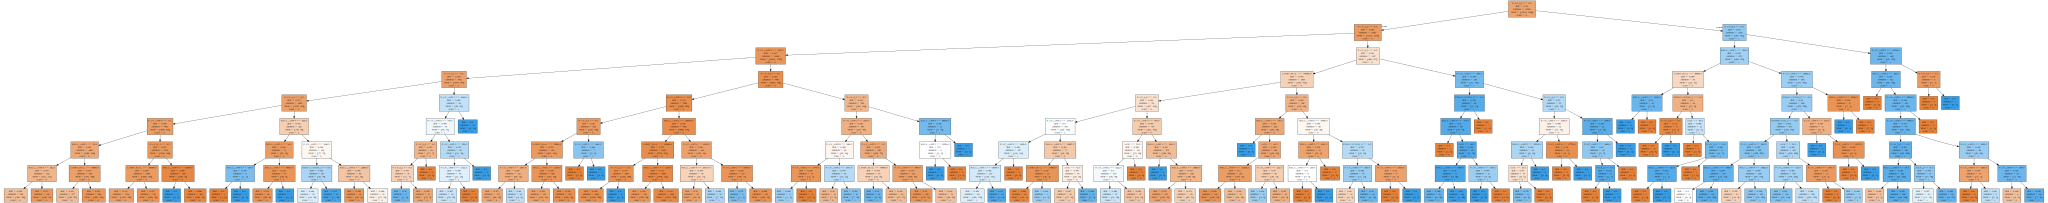

In [112]:
## Plot decision tree hierarchy.
plottree(clf)

In [113]:
## Getting the predictions on train and validation data.
train_pred = clf.predict(train_data_final)
test_pred = clf.predict(test_data_final)

In [114]:
## Get confusion matrix for train and validation data and print it.
confusion_matrix_train = confusion_matrix(y_train, train_pred)
confusion_matrix_test = confusion_matrix(y_test, test_pred)

print(confusion_matrix_train)
print(confusion_matrix_test)

[[10975   537]
 [ 1765  1423]]
[[4525  318]
 [ 908  549]]


In [115]:
Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
TNR_Train= confusion_matrix_train[0,0]/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1])
TPR_Train= confusion_matrix_train[1,1]/(confusion_matrix_train[1,0]+confusion_matrix_train[1,1])

print("Train TNR: ",TNR_Train)
print("\n")
print("Train TPR: ",TPR_Train)
print("\n")
print("Train Accuracy: ",Accuracy_Train)

Train TNR:  0.953353022932592


Train TPR:  0.44636135508155583


Train Accuracy:  0.8434013605442177


In [116]:
Accuracy_Test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
TNR_Test= confusion_matrix_test[0,0]/(confusion_matrix_test[0,0] +confusion_matrix_test[0,1])
TPR_Test= confusion_matrix_test[1,1]/(confusion_matrix_test[1,0] +confusion_matrix_test[1,1])

print("Test TNR: ",TNR_Test)
print("\n")
print("Test TPR: ",TPR_Test)
print("\n")
print("Test Accuracy: ",Accuracy_Test)

Test TNR:  0.9343382201115011


Test TPR:  0.3768016472203157


Test Accuracy:  0.8053968253968254


In [118]:
## Display TNR,TPR,Accuray values train data.
print(classification_report(y_true=y_train,y_pred=train_pred))

              precision    recall  f1-score   support

           0       0.86      0.95      0.91     11512
           1       0.73      0.45      0.55      3188

    accuracy                           0.84     14700
   macro avg       0.79      0.70      0.73     14700
weighted avg       0.83      0.84      0.83     14700



In [117]:
## Display TNR,TPR,Accuray values test data.
print(classification_report(y_true=y_test,y_pred=test_pred))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88      4843
           1       0.63      0.38      0.47      1457

    accuracy                           0.81      6300
   macro avg       0.73      0.66      0.68      6300
weighted avg       0.79      0.81      0.79      6300



In [119]:
############################################ Logistic Regression Model ########################################################

In [2]:
## Import logistic regression library.
from sklearn.linear_model import LogisticRegression

In [3]:
## Instantiate logistic regression model.
logmod=LogisticRegression()
logmod

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [121]:
## Fit a model and display coefficients and intercept.
log_mod=logmod.fit(train_data_final,y_train)
print(log_mod.coef_)
print(log_mod.intercept_)

[[-5.22447597e-06 -2.04678946e-04 -1.28517498e-05  1.02046783e-05
  -9.25210928e-07  1.45948704e-06  4.41856737e-06  2.45332384e-06
  -4.62718532e-05 -2.02525177e-05 -1.87420214e-05 -1.47232114e-05
  -8.47980062e-06 -5.00175627e-06 -4.33900513e-06 -1.35713136e-06
  -3.40988230e-06 -1.38536471e-06 -8.11216217e-08 -2.52791619e-07
  -2.84961235e-08 -1.21593461e-06 -5.21903380e-06 -4.38956247e-08
  -5.98346665e-07 -1.06987705e-05  2.63694982e-07  4.78963882e-06
   6.52446076e-07  7.15039222e-08  2.26128731e-08  2.35576805e-08
   1.57557782e-08 -2.55100371e-09 -5.34298296e-07 -9.22780135e-06
   1.83307538e-09  3.84977774e-06  3.60664006e-07  4.42119643e-08
   2.50507863e-08  1.07058534e-08 -2.55100371e-09  0.00000000e+00
  -6.97739715e-07 -8.20182622e-06 -8.85801659e-10  3.01999471e-06
   2.63360873e-07  8.67811384e-08  2.90133738e-09 -7.32189318e-09
   6.27184128e-08  1.98390282e-09 -6.64585511e-07 -7.79059187e-06
   2.66382073e-06  2.06025218e-07  1.14890769e-07 -9.98106900e-09
   2.75311

C:\Users\nagar\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [122]:
## Get prediction and confuson matrix for train data.
train_pred=log_mod.predict(train_data_final)
confusion_matrix(y_true=y_train,y_pred=train_pred)

array([[11502,    10],
       [ 3184,     4]], dtype=int64)

In [123]:
## Get prediction and confuson matrix for validation data.
test_pred=log_mod.predict(test_data_final)
confusion_matrix(y_true=y_test,y_pred=test_pred)

array([[4840,    3],
       [1456,    1]], dtype=int64)

In [124]:
## Get prediction probabilities for train data.
train_pred=logmod.predict_proba(train_data_final)
print(len(train_pred))
print(train_pred[0:10])

14700
[[0.75306893 0.24693107]
 [0.66354152 0.33645848]
 [0.56770161 0.43229839]
 [0.98695109 0.01304891]
 [0.75881793 0.24118207]
 [0.90630323 0.09369677]
 [0.89416739 0.10583261]
 [0.66031079 0.33968921]
 [0.95687509 0.04312491]
 [0.79668115 0.20331885]]


In [127]:
## Import roc curve library.
from sklearn.metrics import roc_curve

In [128]:
## Get TPR,FPR,Threashold values from roc curve and prepares a data frame.
fpr,tpr,thresholds=roc_curve(y_true=y_train,y_score=success)
res=pd.DataFrame({'FPR':fpr,'TPR':tpr,'Threshold':thresholds})

No handles with labels found to put in legend.


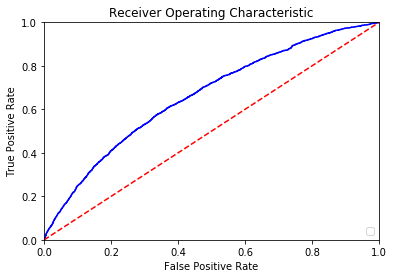

In [129]:
## Plot ROC Curve for TPR vs FPR.
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [136]:
## Get prediction probabilities for test data.
tes_pred=logmod.predict_proba(test_data_final)
tes_pred=[i[1]for i in tes_pred]
tes_pred1=[]
## if the prediction value  is less than .5 then map to 0 else 1.
for i in tes_pred:
    if i<0.5:
        tes_pred1.append(0)
    else:
        tes_pred1.append(1)

In [137]:
## Get confusion matrix for test data.
confusion_matrix_test = confusion_matrix(y_test, tes_pred1)
print(confusion_matrix_test)

[[4840    3]
 [1456    1]]


In [139]:
Accuracy_Test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
TNR_Test= confusion_matrix_test[0,0]/(confusion_matrix_test[0,0] +confusion_matrix_test[0,1])
TPR_Test= confusion_matrix_test[1,1]/(confusion_matrix_test[1,0] +confusion_matrix_test[1,1])

print("Test TNR: ",TNR_Test)
print("\n")
print("Test TPR: ",TPR_Test)
print("\n")
print("Test Accuracy: ",Accuracy_Test)

Test TNR:  0.9993805492463349


Test TPR:  0.0006863417982155113


Test Accuracy:  0.7684126984126984


In [140]:
######################################### Naive Bayes #########################################################################

In [141]:
## Import naive bayes model library.
from sklearn.naive_bayes import GaussianNB

In [142]:
## Instantiate naive bayes model.
model = GaussianNB()

In [143]:
## Fit a model.
model.fit(train_data_final,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [144]:
## Get predictions on train data.
predict_train = model.predict(train_data_final)

In [145]:
## Get predictions on validation data.
predict_test = model.predict(test_data_final)

In [146]:
## Get confusion matrix for train data.
confusion_matrix_train = confusion_matrix(y_train, predict_train)
print(confusion_matrix_train)

[[2026 9486]
 [ 223 2965]]


In [147]:
## Get confusion matrix for validation data.
confusion_matrix_test = confusion_matrix(y_test, predict_test)
print(confusion_matrix_test)

[[ 865 3978]
 [ 115 1342]]


In [148]:
Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
TNR_Train= confusion_matrix_train[0,0]/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1])
TPR_Train= confusion_matrix_train[1,1]/(confusion_matrix_train[1,0]+confusion_matrix_train[1,1])

print("Train TNR: ",TNR_Train)
print("\n")
print("Train TPR: ",TPR_Train)
print("\n")
print("Train Accuracy: ",Accuracy_Train)

Train TNR:  0.17599027102154274


Train TPR:  0.9300501882057717


Train Accuracy:  0.3395238095238095


In [149]:
Accuracy_Test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
TNR_Test= confusion_matrix_test[0,0]/(confusion_matrix_test[0,0] +confusion_matrix_test[0,1])
TPR_Test= confusion_matrix_test[1,1]/(confusion_matrix_test[1,0] +confusion_matrix_test[1,1])

print("Test TNR: ",TNR_Test)
print("\n")
print("Test TPR: ",TPR_Test)
print("\n")
print("Test Accuracy: ",Accuracy_Test)

Test TNR:  0.1786083006400991


Test TPR:  0.9210706932052162


Test Accuracy:  0.3503174603174603


In [150]:
################################################## KNN ######################################################################

In [4]:
## Import KNN model library.
from sklearn.neighbors import KNeighborsClassifier

In [152]:
## Instantiate KNN model.
knn = KNeighborsClassifier(algorithm = 'brute',  ## Algorithm used to compute the nearest neighbors.
                           n_neighbors = 3,      ## Number of neighbors to use by default for :meth:`kneighbors` queries.
                           metric = "euclidean") ## The distance metric to use for the tree. 

In [153]:
## Fit a model.
knn.fit(train_data_final, y_train)

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [154]:
## Get predicctions on train data.
train_pred = knn.predict(train_data_final)

In [155]:
## Get predicctions on test data.
test_pred = knn.predict(test_data_final)

In [156]:
## Get confusion matrix for train data.
confusion_matrix_train = confusion_matrix(y_train, train_pred)
print(confusion_matrix_train)

[[10963   549]
 [ 1649  1539]]


In [157]:
## Get confusion matrix for test data.
confusion_matrix_test = confusion_matrix(y_test, test_pred)
print(confusion_matrix_test)

[[4302  541]
 [1170  287]]


In [158]:
Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
TNR_Train= confusion_matrix_train[0,0]/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1])
TPR_Train= confusion_matrix_train[1,1]/(confusion_matrix_train[1,0]+confusion_matrix_train[1,1])

print("Train TNR: ",TNR_Train)
print("\n")
print("Train TPR: ",TPR_Train)
print("\n")
print("Train Accuracy: ",Accuracy_Train)

Train TNR:  0.9523106323835997


Train TPR:  0.4827478042659975


Train Accuracy:  0.8504761904761905


In [159]:
Accuracy_Test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
TNR_Test= confusion_matrix_test[0,0]/(confusion_matrix_test[0,0] +confusion_matrix_test[0,1])
TPR_Test= confusion_matrix_test[1,1]/(confusion_matrix_test[1,0] +confusion_matrix_test[1,1])

print("Test TNR: ",TNR_Test)
print("\n")
print("Test TPR: ",TPR_Test)
print("\n")
print("Test Accuracy: ",Accuracy_Test)

Test TNR:  0.8882923807557299


Test TPR:  0.19698009608785175


Test Accuracy:  0.7284126984126984


In [160]:
############################################## Random Forest ################################################################

In [161]:
## Import Random forest model library.
from sklearn.ensemble import RandomForestClassifier

In [162]:
## Instantiate Randomforest.
rc = RandomForestClassifier(n_estimators=30,max_depth=10,n_jobs=-1)

In [163]:
## Fit a model.
rc.fit(train_data_final,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [164]:
## Get predictions on train and test data.
train_pred = rc.predict(train_data_final)
test_pred = rc.predict(test_data_final)

In [165]:
## Get confusion matrix for train data.
confusion_matrix_train = confusion_matrix(y_train, train_pred)
print(confusion_matrix_train)

[[11278   234]
 [ 1816  1372]]


In [166]:
## Get confusion matrix for test data.
confusion_matrix_test = confusion_matrix(y_test, test_pred)
print(confusion_matrix_test)

[[4602  241]
 [ 972  485]]


In [167]:
Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
TNR_Train= confusion_matrix_train[0,0]/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1])
TPR_Train= confusion_matrix_train[1,1]/(confusion_matrix_train[1,0]+confusion_matrix_train[1,1])

print("Train TNR: ",TNR_Train)
print("\n")
print("Train TPR: ",TPR_Train)
print("\n")
print("Train Accuracy: ",Accuracy_Train)

Train TNR:  0.979673384294649


Train TPR:  0.43036386449184444


Train Accuracy:  0.8605442176870748


In [168]:
Accuracy_Test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
TNR_Test= confusion_matrix_test[0,0]/(confusion_matrix_test[0,0] +confusion_matrix_test[0,1])
TPR_Test= confusion_matrix_test[1,1]/(confusion_matrix_test[1,0] +confusion_matrix_test[1,1])

print("Test TNR: ",TNR_Test)
print("\n")
print("Test TPR: ",TPR_Test)
print("\n")
print("Test Accuracy: ",Accuracy_Test)

Test TNR:  0.9502374561222383


Test TPR:  0.332875772134523


Test Accuracy:  0.8074603174603174


In [169]:
## Get predictions on test data.
test_data_predictions = rc.predict(test_data_combine)

In [170]:
## Prepare data frame with ID,default_payment_next_month columns data.
dataframe1 = pd.DataFrame({'ID' : test_data.index,
                          'default_payment_next_month' : test_data_predictions})

In [171]:
## Copy dataframe into csv file with name CredictCardApprovalPredictions.
dataframe1.to_csv('CredictCardApprovalPredictions.csv',index=False)

In [172]:
##################################################### Bagging ############################################################

In [173]:
## Import baggining model library.
from sklearn.ensemble import BaggingClassifier

In [174]:
## Instantiate bagging model and fit it.
clf = BaggingClassifier(n_estimators=10)
clf.fit(X=train_data_final, y=y_train)

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [175]:
## Get predictions on train and validation data.
train_pred = clf.predict(train_data_final)
test_pred = clf.predict(test_data_final)

In [176]:
## Get confusion matrix on train data.
confusion_matrix_train = confusion_matrix(y_train, train_pred)
print(confusion_matrix_train)

[[11500    12]
 [  274  2914]]


In [177]:
## Get confusion matrix on validation data.
confusion_matrix_test = confusion_matrix(y_test, test_pred)
print(confusion_matrix_test)

[[4527  316]
 [ 992  465]]


In [178]:
Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
TNR_Train= confusion_matrix_train[0,0]/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1])
TPR_Train= confusion_matrix_train[1,1]/(confusion_matrix_train[1,0]+confusion_matrix_train[1,1])

print("Train TNR: ",TNR_Train)
print("\n")
print("Train TPR: ",TPR_Train)
print("\n")
print("Train Accuracy: ",Accuracy_Train)

Train TNR:  0.9989576094510076


Train TPR:  0.9140526976160602


Train Accuracy:  0.9805442176870748


In [179]:
Accuracy_Test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
TNR_Test= confusion_matrix_test[0,0]/(confusion_matrix_test[0,0] +confusion_matrix_test[0,1])
TPR_Test= confusion_matrix_test[1,1]/(confusion_matrix_test[1,0] +confusion_matrix_test[1,1])

print("Test TNR: ",TNR_Test)
print("\n")
print("Test TPR: ",TPR_Test)
print("\n")
print("Test Accuracy: ",Accuracy_Test)

Test TNR:  0.9347511872806112


Test TPR:  0.3191489361702128


Test Accuracy:  0.7923809523809524


In [180]:
########################################## AdaBoost ##############################################################

In [181]:
## Import adaboost model library.
from sklearn.ensemble import AdaBoostClassifier

In [182]:
## Instantiate ada boost and fit a model.
Adaboost_model = AdaBoostClassifier(n_estimators=50,learning_rate=1)
%time Adaboost_model.fit(train_data_final, y_train)

Wall time: 3.01 s


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,
                   n_estimators=50, random_state=None)

In [183]:
## Get predictions on train and validation data.
train_pred = Adaboost_model.predict(train_data_final)
test_pred = Adaboost_model.predict(test_data_final)

In [184]:
## Get confusion matrix on train data.
confusion_matrix_train = confusion_matrix(y_train, train_pred)
print(confusion_matrix_train)

[[11011   501]
 [ 2087  1101]]


In [185]:
## Get confusion matrix on validation data.
confusion_matrix_test = confusion_matrix(y_test, test_pred)
print(confusion_matrix_test)

[[4605  238]
 [ 988  469]]


In [186]:
Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
TNR_Train= confusion_matrix_train[0,0]/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1])
TPR_Train= confusion_matrix_train[1,1]/(confusion_matrix_train[1,0]+confusion_matrix_train[1,1])

print("Train TNR: ",TNR_Train)
print("\n")
print("Train TPR: ",TPR_Train)
print("\n")
print("Train Accuracy: ",Accuracy_Train)

Train TNR:  0.9564801945795691


Train TPR:  0.34535759096612295


Train Accuracy:  0.8239455782312926


In [187]:
Accuracy_Test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
TNR_Test= confusion_matrix_test[0,0]/(confusion_matrix_test[0,0] +confusion_matrix_test[0,1])
TPR_Test= confusion_matrix_test[1,1]/(confusion_matrix_test[1,0] +confusion_matrix_test[1,1])

print("Test TNR: ",TNR_Test)
print("\n")
print("Test TPR: ",TPR_Test)
print("\n")
print("Test Accuracy: ",Accuracy_Test)

Test TNR:  0.9508569068759034


Test TPR:  0.3218943033630748


Test Accuracy:  0.8053968253968254


In [188]:
## Get predictions on test data.
test_data_predictions = Adaboost_model.predict(test_data_combine)

In [189]:
## Prepare a dataframe with ID,default_payment_next_month columns.
dataframe1 = pd.DataFrame({'ID' : test_data.index,
                          'default_payment_next_month' : test_data_predictions})

In [190]:
## Store dataframe data into csv file.
dataframe1.to_csv('CredictCardApprovalPredictions_AdaBoost.csv',index=False)

In [191]:
#################################### Gradient Boosting #################################################################

In [192]:
## immport gradient boost model library.
from sklearn.ensemble import GradientBoostingClassifier

In [193]:
## Instantiate GD model and fit it.
gbm = GradientBoostingClassifier(n_estimators=100,learning_rate=0.3)
%time gbm.fit(X=train_data_final, y=y_train)

Wall time: 10.7 s


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.3, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [194]:
## Get predictions on train and test.
train_pred = gbm.predict(train_data_final)
test_pred = gbm.predict(test_data_final)

In [195]:
## Get confusion matrix for train data.
confusion_matrix_train = confusion_matrix(y_train, train_pred)
print(confusion_matrix_train)

[[11059   453]
 [ 1764  1424]]


In [196]:
## Get confusion matrix for validation data.
confusion_matrix_test = confusion_matrix(y_test, test_pred)
print(confusion_matrix_test)

[[4547  296]
 [ 936  521]]


In [197]:
Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
TNR_Train= confusion_matrix_train[0,0]/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1])
TPR_Train= confusion_matrix_train[1,1]/(confusion_matrix_train[1,0]+confusion_matrix_train[1,1])

print("Train TNR: ",TNR_Train)
print("\n")
print("Train TPR: ",TPR_Train)
print("\n")
print("Train Accuracy: ",Accuracy_Train)

Train TNR:  0.9606497567755385


Train TPR:  0.4466750313676286


Train Accuracy:  0.8491836734693877


In [198]:
Accuracy_Test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
TNR_Test= confusion_matrix_test[0,0]/(confusion_matrix_test[0,0] +confusion_matrix_test[0,1])
TPR_Test= confusion_matrix_test[1,1]/(confusion_matrix_test[1,0] +confusion_matrix_test[1,1])

print("Test TNR: ",TNR_Test)
print("\n")
print("Test TPR: ",TPR_Test)
print("\n")
print("Test Accuracy: ",Accuracy_Test)

Test TNR:  0.9388808589717117


Test TPR:  0.3575840768702814


Test Accuracy:  0.8044444444444444


In [200]:
## Get predictions on test data.
test_data_predictions = gbm.predict(test_data_combine)

In [201]:
## Prepares data frame with ID, default_payment_next_month columns.
dataframe1 = pd.DataFrame({'ID' : test_data.index,
                          'default_payment_next_month' : test_data_predictions})

In [202]:
## Store dataframe data into csv file.
dataframe1.to_csv('CredictCardApprovalPredictions_GradientBoost.csv',index=False)

In [203]:
######################################### XG Boosting #########################################################

In [204]:
## Import XGB model library.
from xgboost.sklearn import XGBClassifier

In [205]:
## Instantiate  xgb model and fit it.
xgb_model=XGBClassifier(n_estimators=200)
xgb_model.fit(train_data_final,y_train,verbose=True)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [206]:
## Get predictions on train and test data.
train_pred = xgb_model.predict(train_data_final)
test_pred = xgb_model.predict(test_data_final)

In [207]:
## Get confusion matrix for train data.
confusion_matrix_train = confusion_matrix(y_train, train_pred)
print(confusion_matrix_train)

[[11040   472]
 [ 1938  1250]]


In [208]:
## Get confusion matrix for validation data.
confusion_matrix_test = confusion_matrix(y_test, test_pred)
print(confusion_matrix_test)

[[4595  248]
 [ 951  506]]


In [209]:
Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
TNR_Train= confusion_matrix_train[0,0]/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1])
TPR_Train= confusion_matrix_train[1,1]/(confusion_matrix_train[1,0]+confusion_matrix_train[1,1])

print("Train TNR: ",TNR_Train)
print("\n")
print("Train TPR: ",TPR_Train)
print("\n")
print("Train Accuracy: ",Accuracy_Train)

Train TNR:  0.9589993050729674


Train TPR:  0.39209535759096614


Train Accuracy:  0.8360544217687075


In [210]:
Accuracy_Test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
TNR_Test= confusion_matrix_test[0,0]/(confusion_matrix_test[0,0] +confusion_matrix_test[0,1])
TPR_Test= confusion_matrix_test[1,1]/(confusion_matrix_test[1,0] +confusion_matrix_test[1,1])

print("Test TNR: ",TNR_Test)
print("\n")
print("Test TPR: ",TPR_Test)
print("\n")
print("Test Accuracy: ",Accuracy_Test)

Test TNR:  0.9487920710303531


Test TPR:  0.3472889498970487


Test Accuracy:  0.8096825396825397


In [211]:
## Get predictions on test data.
test_data_predictions = xgb_model.predict(test_data_combine)

In [212]:
## Prepares data frame with ID,default_payment_next_month columns.
dataframe1 = pd.DataFrame({'ID' : test_data.index,
                          'default_payment_next_month' : test_data_predictions})

In [213]:
## Store dataframe data into csv file.
dataframe1.to_csv('CredictCardApprovalPredictions_XGBoost.csv',index=False)

In [214]:
########################################## SVC ########################################################################

In [215]:
## Import svc model library.
from sklearn.svm import SVC

In [216]:
## Instantiate svc model.
svc_c10_rbf = SVC(C=10,kernel='rbf')

In [217]:
## Fit a model.
svc_c10_rbf.fit(X=train_data_final,y=y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [218]:
## Get predictions on train and validations data.
train_pred = svc_c10_rbf.predict(train_data_final)
test_pred = svc_c10_rbf.predict(test_data_final)

In [219]:
## Get confusion matrix for train data.
confusion_matrix_train = confusion_matrix(y_train, train_pred)
print(confusion_matrix_train)

[[11512     0]
 [ 3162    26]]


In [220]:
## Get confusion matrix for validation data.
confusion_matrix_test = confusion_matrix(y_test, test_pred)
print(confusion_matrix_test)

[[4833   10]
 [1456    1]]


In [221]:
Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
TNR_Train= confusion_matrix_train[0,0]/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1])
TPR_Train= confusion_matrix_train[1,1]/(confusion_matrix_train[1,0]+confusion_matrix_train[1,1])

print("Train TNR: ",TNR_Train)
print("\n")
print("Train TPR: ",TPR_Train)
print("\n")
print("Train Accuracy: ",Accuracy_Train)

Train TNR:  1.0


Train TPR:  0.008155583437892095


Train Accuracy:  0.7848979591836734


In [222]:
Accuracy_Test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
TNR_Test= confusion_matrix_test[0,0]/(confusion_matrix_test[0,0] +confusion_matrix_test[0,1])
TPR_Test= confusion_matrix_test[1,1]/(confusion_matrix_test[1,0] +confusion_matrix_test[1,1])

print("Test TNR: ",TNR_Test)
print("\n")
print("Test TPR: ",TPR_Test)
print("\n")
print("Test Accuracy: ",Accuracy_Test)

Test TNR:  0.9979351641544497


Test TPR:  0.0006863417982155113


Test Accuracy:  0.7673015873015873


In [223]:
## Get predictions on test data.
test_data_predictions = svc_c10_rbf.predict(test_data_combine)

In [224]:
## Prepare a dataframe with ID,default_payment_next_month columns.
dataframe1 = pd.DataFrame({'ID' : test_data.index,
                          'default_payment_next_month' : test_data_predictions})

In [225]:
## Store dataframe data into csv file.
dataframe1.to_csv('CredictCardApprovalPredictions_SVM.csv',index=False)

In [226]:
#################################################### Neural Network ############################################################

In [227]:
## Import necessary libraries for neural network model.
from keras.models import Sequential, Model
from keras.layers import Dense, Input

In [228]:
## Instantiate sequential model.
perceptron_model = Sequential()

## Add dense layer to model.
perceptron_model.add(Dense(1, input_dim=train_data_final.shape[1], activation='sigmoid', kernel_initializer='normal'))

In [229]:
## Compile the model.
perceptron_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [230]:
## Fit a model.
perceptron_model.fit(train_data_final, y_train, epochs=100)

Epoch 1/100
14700/14700 [==============================] - 1s 68us/step - loss: 349.3573 - accuracy: 0.6767
Epoch 2/100
14700/14700 [==============================] - 1s 59us/step - loss: 67.1394 - accuracy: 0.7003
Epoch 3/100
14700/14700 [==============================] - 1s 71us/step - loss: 47.9783 - accuracy: 0.6970
Epoch 4/100
14700/14700 [==============================] - 1s 58us/step - loss: 23.2053 - accuracy: 0.6968
Epoch 5/100
14700/14700 [==============================] - 1s 75us/step - loss: 25.6066 - accuracy: 0.6972
Epoch 6/100
14700/14700 [==============================] - 1s 85us/step - loss: 19.4451 - accuracy: 0.6953
Epoch 7/100
14700/14700 [==============================] - 1s 70us/step - loss: 26.9834 - accuracy: 0.6992
Epoch 8/100
14700/14700 [==============================] - 2s 108us/step - loss: 26.8407 - accuracy: 0.6968
Epoch 9/100
14700/14700 [==============================] - 1s 99us/step - loss: 18.7756 - accuracy: 0.6982
Epoch 10/100
14700/14700 [=========

In [231]:
## Get predictions on train and validation data.
test_pred=perceptron_model.predict_classes(test_data_final)
train_pred=perceptron_model.predict_classes(train_data_final)

In [232]:
## Get confusion matrix for train data.
confusion_matrix_train = confusion_matrix(y_train, train_pred)
print(confusion_matrix_train)

[[9890 1622]
 [1826 1362]]


In [233]:
## Get confusion matrix for validation data.
confusion_matrix_test = confusion_matrix(y_test, test_pred)
print(confusion_matrix_test)

[[4151  692]
 [ 828  629]]


In [234]:
Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
TNR_Train= confusion_matrix_train[0,0]/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1])
TPR_Train= confusion_matrix_train[1,1]/(confusion_matrix_train[1,0]+confusion_matrix_train[1,1])

print("Train TNR: ",TNR_Train)
print("\n")
print("Train TPR: ",TPR_Train)
print("\n")
print("Train Accuracy: ",Accuracy_Train)

Train TNR:  0.8591035441278666


Train TPR:  0.4272271016311167


Train Accuracy:  0.7654421768707483


In [235]:
Accuracy_Test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
TNR_Test= confusion_matrix_test[0,0]/(confusion_matrix_test[0,0] +confusion_matrix_test[0,1])
TPR_Test= confusion_matrix_test[1,1]/(confusion_matrix_test[1,0] +confusion_matrix_test[1,1])

print("Test TNR: ",TNR_Test)
print("\n")
print("Test TPR: ",TPR_Test)
print("\n")
print("Test Accuracy: ",Accuracy_Test)

Test TNR:  0.8571133594879207


Test TPR:  0.4317089910775566


Test Accuracy:  0.7587301587301587


In [236]:
## Get predictions for test data.
test_data_predictions = perceptron_model.predict(test_data_combine) #### but the prediction values are not in the form of 0 and 1

In [237]:
## Display test data predictions.
test_data_predictions

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [240]:
## If the prediction vallues is 0 then map to 0 else map to 1.
temp_data=[]
for i in test_data_predictions:
    if(i==0):
        temp_data.append(0)
    else:
        temp_data.append(1)


In [ ]:
## Display prediction values after mapping.
temp_data[:10]

In [243]:
## Get length of predictions.
len(temp_data)

9000

In [238]:
## Prepare a dataframe with ID,default_payment_next_month columns data.
dataframe1 = pd.DataFrame({'ID' : test_data.index,
                          'default_payment_next_month' : test_data_predictions.flatten()}) ### flatten() will convert 2D to 1D here....

In [239]:
## Copy dataframe values to csv file.
dataframe1.to_csv('CredictCardApprovalPredictions_NeuralNetworks.csv',index=False)

In [244]:
## Prepare a dataframe with ID,default_payment_next_month columns data.
dataframe1 = pd.DataFrame({'ID' : test_data.index,
                          'default_payment_next_month' : temp_data}) ### flatten() will convert 2D to 1D here....

In [245]:
## Copy dataframe values to csv file.
dataframe1.to_csv('CredictCardApprovalPredictions_NeuralNetworks_1.csv',index=False)

In [246]:
################################ Perform Grid Search,Ridge,Lasso ###############################################################

In [247]:
## Import necessary library to build ridge,lasso models.
from sklearn.linear_model import RidgeClassifier, Lasso

In [248]:
## Import grid search library.
from sklearn.model_selection import GridSearchCV 
#Ridge regression is parametric and takes a parameter alpha. The value of alpha determines the reduction in magnitude of coefficients.
#But we also need to check which value of alpha gives best predictions on test data. For this we experiment with several values of alpha and pick the best
#We do this by performing grid search over several values of alpha 
alphas = np.array([1,0.1,0.01,0.001,0.0001,0,1.5,2]) #Pick the best of these values
# create and fit a ridge regression model, testing each alpha
model_ridge = RidgeClassifier()
grid = GridSearchCV(estimator=model_ridge, param_grid=dict(alpha=alphas),cv=10) #Here the argument cv=10 implies compute error on 10 chucks of data and report average value
## Fit a model.
grid.fit(train_data_final,y_train)
## Display ridge model parameters.
print(grid)

C:\Users\nagar\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.781165e-17
  overwrite_a=True).T
C:\Users\nagar\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.198614e-17
  overwrite_a=True).T
C:\Users\nagar\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.463638e-17
  overwrite_a=True).T
C:\Users\nagar\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.195277e-17
  overwrite_a=True).T
C:\U

GridSearchCV(cv=10, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([1.0e+00, 1.0e-01, 1.0e-02, 1.0e-03, 1.0e-04, 0.0e+00, 1.5e+00,
       2.0e+00])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)


In [249]:
## Display best score value.
print(grid.best_score_)
print(grid.best_estimator_.alpha)

0.21025734694537407
2.0


In [250]:
## Build a rige model with best alpha value.
Ridge_model= RidgeClassifier(alpha=2,normalize=False)
## Fit a model.
Ridge_model.fit(train_data_final,y_train) #Applying it on the train data, to obtain the coefficients

Ridge(alpha=2, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [251]:
## Get the predictions on train and validations data.
pred_train = Ridge_model.predict(train_data_final)
pred_test = Ridge_model.predict(test_data_final)

In [252]:
## Get confusion matrix for train data.
confusion_matrix_train = confusion_matrix(y_train, train_pred)
print(confusion_matrix_train)

[[9890 1622]
 [1826 1362]]


In [253]:
## Get confusion matrix for validation data.
confusion_matrix_test = confusion_matrix(y_test, test_pred)
print(confusion_matrix_test)

[[4151  692]
 [ 828  629]]


In [254]:
Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
TNR_Train= confusion_matrix_train[0,0]/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1])
TPR_Train= confusion_matrix_train[1,1]/(confusion_matrix_train[1,0]+confusion_matrix_train[1,1])

print("Train TNR: ",TNR_Train)
print("\n")
print("Train TPR: ",TPR_Train)
print("\n")
print("Train Accuracy: ",Accuracy_Train)

Train TNR:  0.8591035441278666


Train TPR:  0.4272271016311167


Train Accuracy:  0.7654421768707483


In [255]:
Accuracy_Test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
TNR_Test= confusion_matrix_test[0,0]/(confusion_matrix_test[0,0] +confusion_matrix_test[0,1])
TPR_Test= confusion_matrix_test[1,1]/(confusion_matrix_test[1,0] +confusion_matrix_test[1,1])

print("Test TNR: ",TNR_Test)
print("\n")
print("Test TPR: ",TPR_Test)
print("\n")
print("Test Accuracy: ",Accuracy_Test)

Test TNR:  0.8571133594879207


Test TPR:  0.4317089910775566


Test Accuracy:  0.7587301587301587


In [256]:
## Get predictions on test data.
test_data_predictions = Ridge_model.predict(test_data_combine) ### prediction values are not in the form of 0 and 1

In [257]:
## Prepare a dataframe with ID,default_payment_next_month columns data.
dataframe1 = pd.DataFrame({'ID' : test_data.index,
                          'default_payment_next_month' : test_data_predictions})

In [258]:
## Copy dataframe data into csv file.
dataframe1.to_csv('CredictCardApprovalPredictions_Ridge.csv',index=False)

In [259]:
#################################################### Lasso ####################################################################

In [260]:
## Instantiate and build model.
model_lasso = Lasso()
grid = GridSearchCV(estimator=model_lasso, param_grid=dict(alpha=alphas),cv=10) #Here the argument cv=10 implies compute error on 10 chucks of data and report average value
grid.fit(train_data_final,y_train)
print(grid)

C:\Users\nagar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5685340287220697, tolerance: 0.22440078609221456
  positive)
C:\Users\nagar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 48.674381184254116, tolerance: 0.22428734693877547
  positive)
C:\Users\nagar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 55.15603803863951, tolerance: 0.22394666666666682
  positive)
C:\Users\nagar\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegressi

GridSearchCV(cv=10, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([1.0e+00, 1.0e-01, 1.0e-02, 1.0e-03, 1.0e-04, 0.0e+00, 1.5e+00,
       2.0e+00])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)


In [261]:
## Display best score value.
print(grid.best_score_)
print(grid.best_estimator_.alpha)

0.21085269669340367
0.0001


In [280]:
## Instantiate Lasso model and fit it.
Lasso_model= Lasso(alpha=0.0001,normalize=False)
Lasso_model.fit(train_data_final,y_train) #Applying it on the train data, to obtain the coefficients

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [281]:
## Get the predictions on train and validation data.
pred_train = Lasso_model.predict(train_data_final)
pred_test = Lasso_model.predict(test_data_final)

In [282]:
## Get predictions for train data.
confusion_matrix_train = confusion_matrix(y_train, train_pred)
print(confusion_matrix_train)

[[9890 1622]
 [1826 1362]]


In [283]:
## Get predictions for validation data.
confusion_matrix_test = confusion_matrix(y_test, test_pred)
print(confusion_matrix_test)

[[4151  692]
 [ 828  629]]


In [284]:
Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
TNR_Train= confusion_matrix_train[0,0]/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1])
TPR_Train= confusion_matrix_train[1,1]/(confusion_matrix_train[1,0]+confusion_matrix_train[1,1])

print("Train TNR: ",TNR_Train)
print("\n")
print("Train TPR: ",TPR_Train)
print("\n")
print("Train Accuracy: ",Accuracy_Train)

Train TNR:  0.8591035441278666


Train TPR:  0.4272271016311167


Train Accuracy:  0.7654421768707483


In [285]:
Accuracy_Test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
TNR_Test= confusion_matrix_test[0,0]/(confusion_matrix_test[0,0] +confusion_matrix_test[0,1])
TPR_Test= confusion_matrix_test[1,1]/(confusion_matrix_test[1,0] +confusion_matrix_test[1,1])

print("Test TNR: ",TNR_Test)
print("\n")
print("Test TPR: ",TPR_Test)
print("\n")
print("Test Accuracy: ",Accuracy_Test)

Test TNR:  0.8571133594879207


Test TPR:  0.4317089910775566


Test Accuracy:  0.7587301587301587


In [286]:
## Get predictions for test data.
test_data_predictions = Lasso_model.predict(test_data_combine)

In [287]:
## Prepare a dataframe with ID,default_payment_next_month columns data.
dataframe1 = pd.DataFrame({'ID' : test_data.index,
                          'default_payment_next_month' : test_data_predictions})

In [279]:
## Copy dataframe data into csv file.
dataframe1.to_csv('CredictCardApprovalPredictions_Lasso.csv',index=False)